In [0]:
# NOTE: PLEASE MAKE SURE YOU ARE RUNNING THIS IN A PYTHON3 ENVIRONMENT

import tensorflow as tf
print(tf.__version__)

# This is needed for the iterator over the data
# But not necessary if you have TF 2.0 installed
!pip install tensorflow==2.0.0-beta0


tf.enable_eager_execution()

!pip install -q tensorflow-datasets

     |████████████████████████████████| 87.9MB 1.4MB/s 
     |████████████████████████████████| 501kB 44.9MB/s 
     |████████████████████████████████| 3.1MB 40.9MB/s 
  Found existing installation: tensorflow 1.14.0
    Uninstalling tensorflow-1.14.0:
      Successfully uninstalled tensorflow-1.14.0


     |████████████████████████████████| 686kB 3.3MB/s 
1.14.0


In [0]:
import tensorflow as tf
print(tf.__version__)

2.0.0-beta0


In [0]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

W0701 07:01:18.944410 140059494033280 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_datasets/core/file_format_adapter.py:247: tf_record_iterator (from tensorflow.python.lib.io.tf_record) is deprecated and will be removed in a future version.
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/0.1.0. Subsequent calls will reuse this data.


In [0]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s,l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())
  
for s,l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())
  
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)


In [0]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)



In [0]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

b this was soul provoking i am an iranian and living in <OOV> 21st century i didn't know that such big <OOV> have been living in such conditions at the time of my grandfather br br you see that today or even in <OOV> on one side of the world a lady or a baby could have everything served for him or her clean and on demand but here 80 years ago people <OOV> their life to go to somewhere with more grass it's really interesting that these <OOV> bear those difficulties to find <OOV> for their sheep but they lose many the sheep on their way br br i praise the americans who accompanied this tribe they were as
b"This was soul-provoking! I am an Iranian, and living in th 21st century, I didn't know that such big tribes have been living in such conditions at the time of my grandfather!<br /><br />You see that today, or even in 1925, on one side of the world a lady or a baby could have everything served for him or her clean and on-demand, but here 80 years ago, people ventured their life to go to

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                9600      
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


In [0]:
num_epochs = 10
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

W0701 07:11:43.041890 140059494033280 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 82s 3ms/sample - loss: 0.5120 - accuracy: 0.7181 - val_loss: 0.3516 - val_accuracy: 0.8452
Epoch 2/10
25000/25000 [==============================] - 79s 3ms/sample - loss: 0.2982 - accuracy: 0.8776 - val_loss: 0.3848 - val_accuracy: 0.8446
Epoch 3/10
25000/25000 [==============================] - 78s 3ms/sample - loss: 0.2305 - accuracy: 0.9116 - val_loss: 0.3664 - val_accuracy: 0.8388
Epoch 4/10
25000/25000 [==============================] - 78s 3ms/sample - loss: 0.1773 - accuracy: 0.9340 - val_loss: 0.4234 - val_accuracy: 0.8268
Epoch 5/10
25000/25000 [==============================] - 78s 3ms/sample - loss: 0.1311 - accuracy: 0.9551 - val_loss: 0.4968 - val_accuracy: 0.8254
Epoch 6/10
25000/25000 [==============================] - 77s 3ms/sample - loss: 0.0912 - accuracy: 0.9701 - val_loss: 0.6211 - val_accuracy: 0.8214
Epoch 7/10
25000/25000 [==============================] 

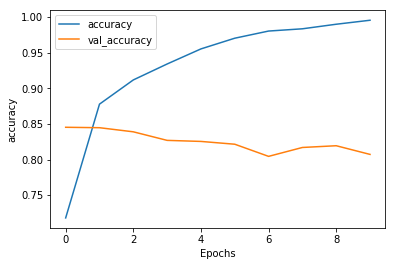

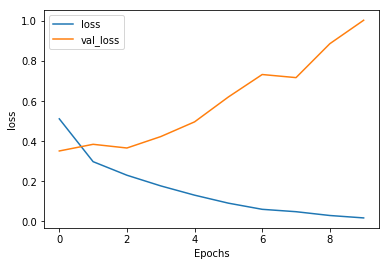

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [0]:
# Model Definition with LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 172,941
Trainable params: 172,941
Non-trainable params: 0
_________________________________________________________________


In [0]:
num_epochs = 10
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 76s 3ms/sample - loss: 0.4650 - accuracy: 0.7727 - val_loss: 0.3548 - val_accuracy: 0.8494
Epoch 2/10
25000/25000 [==============================] - 74s 3ms/sample - loss: 0.2967 - accuracy: 0.8821 - val_loss: 0.3551 - val_accuracy: 0.8453
Epoch 3/10
25000/25000 [==============================] - 71s 3ms/sample - loss: 0.2410 - accuracy: 0.9078 - val_loss: 0.3989 - val_accuracy: 0.8402
Epoch 4/10
25000/25000 [==============================] - 70s 3ms/sample - loss: 0.1990 - accuracy: 0.9278 - val_loss: 0.4251 - val_accuracy: 0.8340
Epoch 5/10
25000/25000 [==============================] - 70s 3ms/sample - loss: 0.1584 - accuracy: 0.9457 - val_loss: 0.5175 - val_accuracy: 0.8264
Epoch 6/10
25000/25000 [==============================] - 69s 3ms/sample - loss: 0.1194 - accuracy: 0.9596 - val_loss: 0.5731 - val_accuracy: 0.8255
Epoch 7/10
25000/25000 [==============================] 

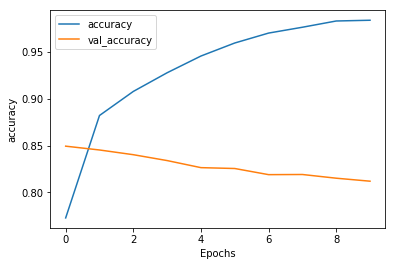

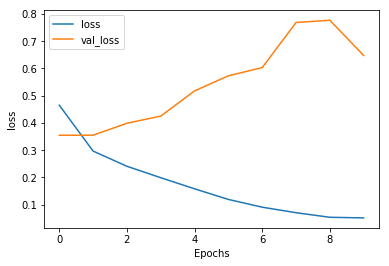

In [0]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [0]:
# Model Definition with Conv1D
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 116, 128)          10368     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 774       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 171,149
Trainable params: 171,149
Non-trainable params: 0
_________________________________________________________________


In [0]:
num_epochs = 10
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 10s 390us/sample - loss: 0.4457 - accuracy: 0.7829 - val_loss: 0.3505 - val_accuracy: 0.8464
Epoch 2/10
25000/25000 [==============================] - 9s 376us/sample - loss: 0.2791 - accuracy: 0.8855 - val_loss: 0.3507 - val_accuracy: 0.8486
Epoch 3/10
25000/25000 [==============================] - 9s 377us/sample - loss: 0.2268 - accuracy: 0.9100 - val_loss: 0.3830 - val_accuracy: 0.8376
Epoch 4/10
25000/25000 [==============================] - 9s 373us/sample - loss: 0.1889 - accuracy: 0.9300 - val_loss: 0.4324 - val_accuracy: 0.8299
Epoch 5/10
25000/25000 [==============================] - 10s 383us/sample - loss: 0.1570 - accuracy: 0.9425 - val_loss: 0.4595 - val_accuracy: 0.8266
Epoch 6/10
25000/25000 [==============================] - 10s 381us/sample - loss: 0.1287 - accuracy: 0.9564 - val_loss: 0.5224 - val_accuracy: 0.8211
Epoch 7/10
25000/25000 [=======================

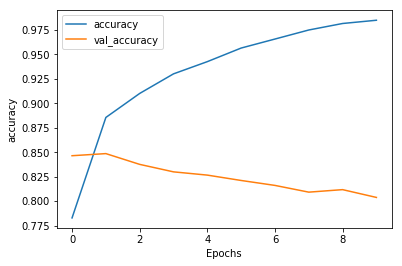

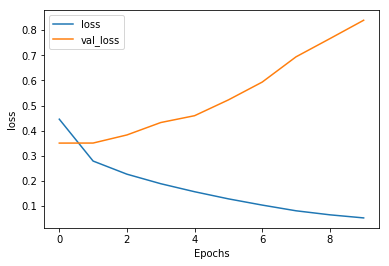

In [0]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')